卷积自编码器
------------------
* 卷积自动编码器架构图

<img src='pic/3-1.png'>

* Convolutional Autoencoder生成图片和原图片对比

<img src='pic/4.png'>

* Convolutional Autoencoder训练accuracy和loss变化图

<img src='pic/5.png'>

In [1]:
import numpy as np

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,Input, UpSampling2D
import matplotlib.pyplot as plt


D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(33)   # random seed，to reproduce results.

CHANNEL_1 = 16
CHANNEL_2 = 8
CHANNEL_OUTPUT = 1
EPOCHS = 20
BATCH_SIZE = 64

In [3]:
def train(x_train):
    """
    build autoencoder.
    :param x_train:  the train data
    :return: encoder and decoder
    """
    # input placeholder
    input_image = Input(shape=(28, 28, 1))

    # encoding layer
    x = Conv2D(CHANNEL_1, (3, 3), activation='relu', padding="same")(input_image)
    x = MaxPool2D((2, 2), padding='same')(x)
    x = Conv2D(CHANNEL_2, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPool2D((2, 2), padding='same')(x)

    # decoding layer
    x = Conv2D(CHANNEL_2, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(CHANNEL_1, (3, 3),activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(CHANNEL_OUTPUT, (3, 3), activation='sigmoid', padding='same')(x)

    # build autoencoder, encoder, decoder
    autoencoder = Model(inputs=input_image, outputs=decoded)
    encoder = Model(inputs=input_image, outputs=encoded)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    autoencoder.summary()

    # training
    # need return history, otherwise can not use history["acc"]
    history_record = autoencoder.fit(x_train, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, )

    return encoder, autoencoder, history_record

In [4]:
def plotAccuray(history_record):
    """
    plot the accuracy and loss line.
    :param history_record:
    :return:
    """
    accuracy = history_record.history["acc"]
    loss = history_record.history["loss"]
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.title('Training accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.title('Training loss')
    plt.legend()
    plt.show()

In [5]:
def showImages(decode_images, x_test):
    """
    plot the images.
    :param decode_images: the images after decoding
    :param x_test: testing data
    :return:
    """
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(decode_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 8)         0         
__________

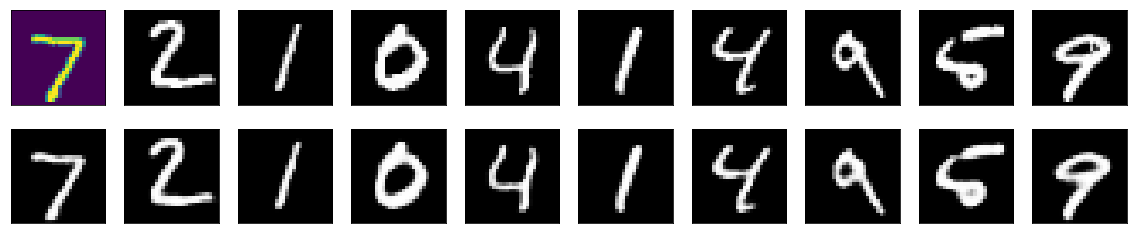

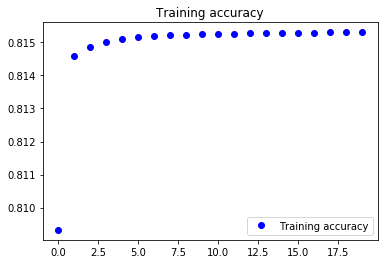

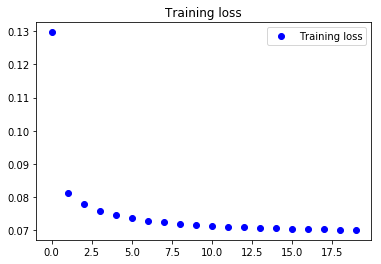

In [6]:
if __name__ == '__main__':
    # Step1： load data  x_train: (60000, 28, 28), y_train: (60000,) x_test: (10000, 28, 28), y_test: (10000,)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Step2: normalize
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Step3: reshape data, x_train: (60000, 28, 28, 1), x_test: (10000, 28, 28, 1), one row denotes one sample.
    x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

    # Step4： train
    encoder, autoencoder, history_record = train(x_train=x_train)

    # show images
    decode_images = autoencoder.predict(x_test)
    showImages(decode_images, x_test)

    plotAccuray(history_record)